In [ ]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

In [ ]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

In [57]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-02-13 16:39:36,042 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:83:85:6a:10:3c
2024-02-13 16:39:38,833 | INFO     |: Connected to c0:83:85:6a:10:3c


/Users/ashley/workspace/ece4160/FastRobots_ble/ble_robot-1.1/ble_python/base_ble.py:91: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [ ]:
# Disconnect
ble.disconnect()

In [7]:
ble.send_command(CMD.ECHO, "the fitness gram pacer test")

In [8]:
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

Robot says -> the fitness gram pacer test


In [58]:
stamped_data = []

def notification_handler(uuid, char_val_array):
    str_data = char_val_array.decode()[2:]
    data = str_data.split(',')
    stamped_data.append(data)

ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [59]:
stamped_data.clear()
ble.send_command(CMD.GET_DIST_DATA, "")

In [ ]:
def print_data():
    print(str(len(stamped_data)) + " datapoints")
    for data_list in stamped_data:
        assert(len(data_list) >= 1)
        line = "T: " + str(data_list[0])
        for i in range(1, len(data_list)):
            line += ", " + data_list[i]
        LOG.info(line)
        
print_data()

In [27]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [64]:
time_data = []
dist0_data = []
dist1_data = []
for data_list in stamped_data:
    assert(len(data_list) >= 1)
    time_data.append((int(data_list[0]) - int(stamped_data[0][0])) / 1000.)
    dist0_data.append(int(data_list[1]))
    dist1_data.append(int(data_list[2]))

print("raw data len: " + str(len(dist0_data)))

raw data len: 1000


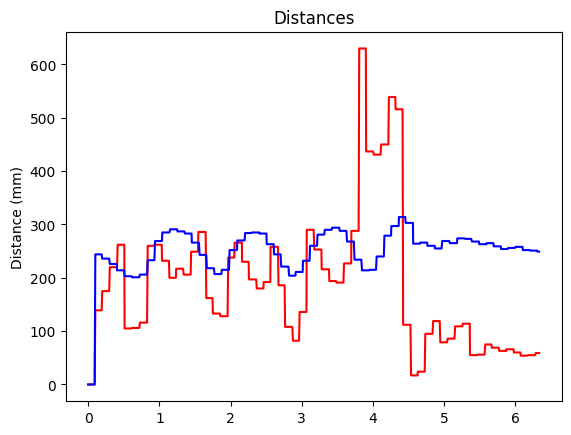

2024-02-13 16:41:28,720 | INFO     |: Disconnected from 324EB812-59E0-5CAF-B992-D25DCF474FBC


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

time = np.array(time_data)
dist0 = np.array(dist0_data)
dist1 = np.array(dist1_data)

plt.plot(time, dist0, 'r')
plt.plot(time, dist1, 'b')
plt.ylabel('Distance (mm)')
plt.title("Distances")
plt.show()